In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tf.test.is_built_with_cuda()

True

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


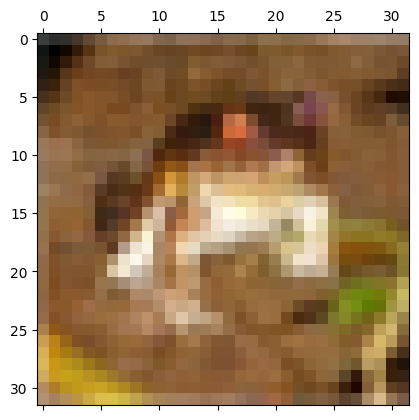

In [5]:
plt.matshow(x_train[0])

In [9]:
# let's check the shape of the this image
x_train[0].shape  # 32*32*3

(32, 32, 3)

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [12]:
# let's check the first five image
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
# let's plot those
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(x_train[index])

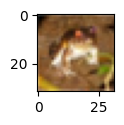

In [20]:
plot_sample(0)

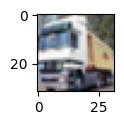

In [21]:
plot_sample(1)

In [29]:
classes=['airoplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

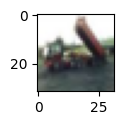

In [22]:
plot_sample(2)

In [30]:
y_train[2]

array([9], dtype=uint8)

In [31]:
classes[y_train[2][0]]

'truck'

In [32]:
y_train[3]

array([4], dtype=uint8)

In [34]:
classes[y_train[3][0]]

'deer'

# Scaling

In [36]:
x_train[0] # array pixels are in between 0 - 255

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [37]:
# let's convert them between 0 -1
x_train_scaled=x_train/255.0

In [38]:
x_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [43]:
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [40]:
# same test
x_test_scaled=x_test/255.0

In [42]:
x_test_scaled[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [44]:
y_test[0]

array([3], dtype=uint8)

In [45]:
y_train[0]

array([6], dtype=uint8)

In [46]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [47]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [48]:
# these are discrete numbers so, let's convert them into categorical by onehot encoding


In [49]:
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)

In [50]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

as you see instead of 6 we have 1 in 6th index in 0th array and so on

In [51]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)

In [52]:
y_test_categorical[0:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

# MODEL BUILDING

In [54]:
from keras import Sequential
from keras import layers

In [55]:
model=Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

# complation
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

why categorical_crossentropy means we are using y_train as onehot encoding

if you use y_train values are discrete then you can use sparse_categorical_crossentropy

In [57]:
model.fit(x_train_scaled,y_train_categorical,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 173s 110ms/step - loss: 1.8893 - accuracy: 0.3294
Epoch 2/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.6595 - accuracy: 0.4044
Epoch 3/5
1563/1563 [==============================] - 156s 100ms/step - loss: 1.5786 - accuracy: 0.4359
Epoch 4/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.5260 - accuracy: 0.4536
Epoch 5/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.4910 - accuracy: 0.4652


In [58]:
# model prediction
model.predict(x_train_scaled)

1563/1563 [==============================] - 25s 16ms/step


array([[0.12693208, 0.20025499, 0.5420616 , ..., 0.5071515 , 0.06611452,
        0.08615268],
       [0.3508112 , 0.9312792 , 0.16223131, ..., 0.19082886, 0.70451075,
        0.9139847 ],
       [0.13808657, 0.94588655, 0.03521043, ..., 0.06568613, 0.7495369 ,
        0.97981185],
       ...,
       [0.5080703 , 0.92020994, 0.05032285, ..., 0.19535562, 0.8513602 ,
        0.9853219 ],
       [0.404356  , 0.9637358 , 0.14686657, ..., 0.0814479 , 0.96598834,
        0.9874058 ],
       [0.52789086, 0.59020734, 0.32507014, ..., 0.65109164, 0.38490513,
        0.69891983]], dtype=float32)

In [59]:
model.predict(x_test_scaled)[0]

313/313 [==============================] - 5s 15ms/step


array([0.4611809 , 0.33764195, 0.37587672, 0.74497724, 0.45241493,
       0.7331628 , 0.51246214, 0.10196527, 0.4443499 , 0.17240433],
      dtype=float32)

In [60]:
# lets know what is the max number
np.argmax(model.predict(x_test_scaled)[0])

313/313 [==============================] - 5s 16ms/step


3

In [61]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [62]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# Measure training time on a CPU

In [64]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 70s 45ms/step - loss: 1.8156 - accuracy: 0.3541
1min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Lets measure training time on a GPU (I've NVIDIA Titan RTX)

In [65]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 71s 45ms/step - loss: 1.8097 - accuracy: 0.3536
1min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Lets run same test for 5 epocs

In [67]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 71s 46ms/step - loss: 1.8152 - accuracy: 0.3525
Epoch 2/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.6261 - accuracy: 0.4282
Epoch 3/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.5411 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4818 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4330 - accuracy: 0.4955
6min 24s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [68]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.8086 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6227 - accuracy: 0.4311
Epoch 3/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5403 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4803 - accuracy: 0.4767
Epoch 5/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4309 - accuracy: 0.4979
6min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
